<a href="https://colab.research.google.com/github/Joyslin-2006/PRODIGY_ML_03/blob/main/CatVsDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import cv2
from sklearn import svm

In [ ]:
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
y_train = y_train.flatten()

In [ ]:
y_test = y_test.flatten()

In [ ]:
cat_dog_train_filter = np.isin(y_train, [3, 5])

In [ ]:
cat_dog_test_filter = np.isin(y_test, [3, 5])

In [ ]:
x_train, y_train = x_train[cat_dog_train_filter], y_train[cat_dog_train_filter]

In [ ]:
x_test, y_test = x_test[cat_dog_test_filter], y_test[cat_dog_test_filter]

In [ ]:
y_train = (y_train == 5).astype(int)

In [ ]:
y_test = (y_test == 5).astype(int)

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
x_train_resized = np.array([image.smart_resize(img, (16, 16)) for img in x_train])

In [ ]:
x_test_resized = np.array([image.smart_resize(img, (16, 16)) for img in x_test])

In [ ]:
x_train_resized = x_train_resized.reshape(-1, 16 * 16 * 3)

In [ ]:
x_test_resized = x_test_resized.reshape(-1, 16 * 16 * 3)

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train_resized = scaler.fit_transform(x_train_resized)

In [ ]:
x_test_resized = scaler.transform(x_test_resized)

In [ ]:
x_train_resized = x_train_resized[:2000]

In [ ]:
y_train = y_train[:2000]

In [ ]:
svm_model = LinearSVC(max_iter=1000)

In [ ]:
svm_model.fit(x_train_resized, y_train)

LinearSVC()

In [ ]:
y_pred = svm_model.predict(x_test_resized)

In [ ]:
print("Classification Report:\n")

Classification Report:



In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.58      0.57      1000
           1       0.56      0.54      0.55      1000

    accuracy                           0.56      2000
   macro avg       0.56      0.56      0.56      2000
weighted avg       0.56      0.56      0.56      2000



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
random_index = np.random.randint(0, len(x_test))

In [ ]:
example_image = x_test[random_index]

In [ ]:
example_label = y_test[random_index]

In [ ]:
example_image_resized = cv2.resize(example_image, (16, 16)).flatten()

In [ ]:
example_image_resized = example_image_resized.astype('float32') / 255

In [ ]:
prediction = svm_model.predict([example_image_resized])

In [ ]:
predicted_class = "dog" if prediction == 5 else "cat"

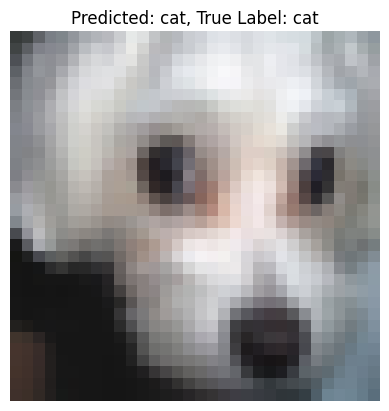

In [ ]:
plt.imshow(example_image)
plt.title(f"Predicted: {predicted_class}, True Label: {'dog' if example_label == 5 else 'cat'}")
plt.axis('off')
plt.show()

In [ ]:
print(f"Model predicted: {predicted_class}")

Model predicted: cat


In [ ]:
print(f"True label: {'dog' if example_label == 5 else 'cat'}")

True label: cat
